In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# Total population of NYC
N = 8538000

# Initial number of exposed, infected and recovered individuals.
E0, I0, R0 = 0, 1, 0
# Everyone else, S0, is susceptible to infection.
S0 = N - E0 - I0 - R0
# Contact rate (alpha), infectious rate (beta), recovery rate (gamma), and vaccination rate (sigma).
alpha, beta, gamma, sigma = 0.75, 0.25,1/5., 0
# A grid of time points (in days)
t = np.linspace(0, 140, 140)

# The SEIR model differential equations.
def deriv(y, t, N, alpha, beta, gamma, sigma):
    S, E, I, R = y
    dSdt = - alpha * S * I/N - sigma * S
    dEdt = alpha * S * I/N - beta * E
    dIdt = beta * E - gamma * I
    dRdt = gamma * I + sigma * S 
    return dSdt, dEdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, E0, I0, R0

# Solving differential equations numerically
ret = odeint(deriv, y0, t, args=(N, alpha, beta, gamma, sigma))
S, E, I, R = ret.T

# Plotting the graph
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/N, 'y', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered or dead')
ax.set_xlabel('Time /days')
ax.set_ylabel('Proportion of the population')
ax.set_ylim(0,1.2)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
pl.title('Natural Influenza Spread in NYC')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.show()

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook

# Draws the dots and edges
def draw(ax, fig, coords, edges, group):
    ax.cla()
    color = {0: "blue", 1: "red", 2: "green", 3: "black"}
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    for v in range(len(edges)):
        for u in edges[v]:
            x = [] 
            y = []
            x.append(coords[v][0])
            x.append(coords[u][0])
            y.append(coords[v][1])
            y.append(coords[u][1])
            ax.plot(x,y, "black")
    for i in range(len(coords)):
        ax.scatter(coords[i][0], coords[i][1], c = color[group[i]], s = 100)
    pl.title('Influenza Spread in NYC')
    fig.canvas.draw()
    

<IPython.core.display.Javascript object>


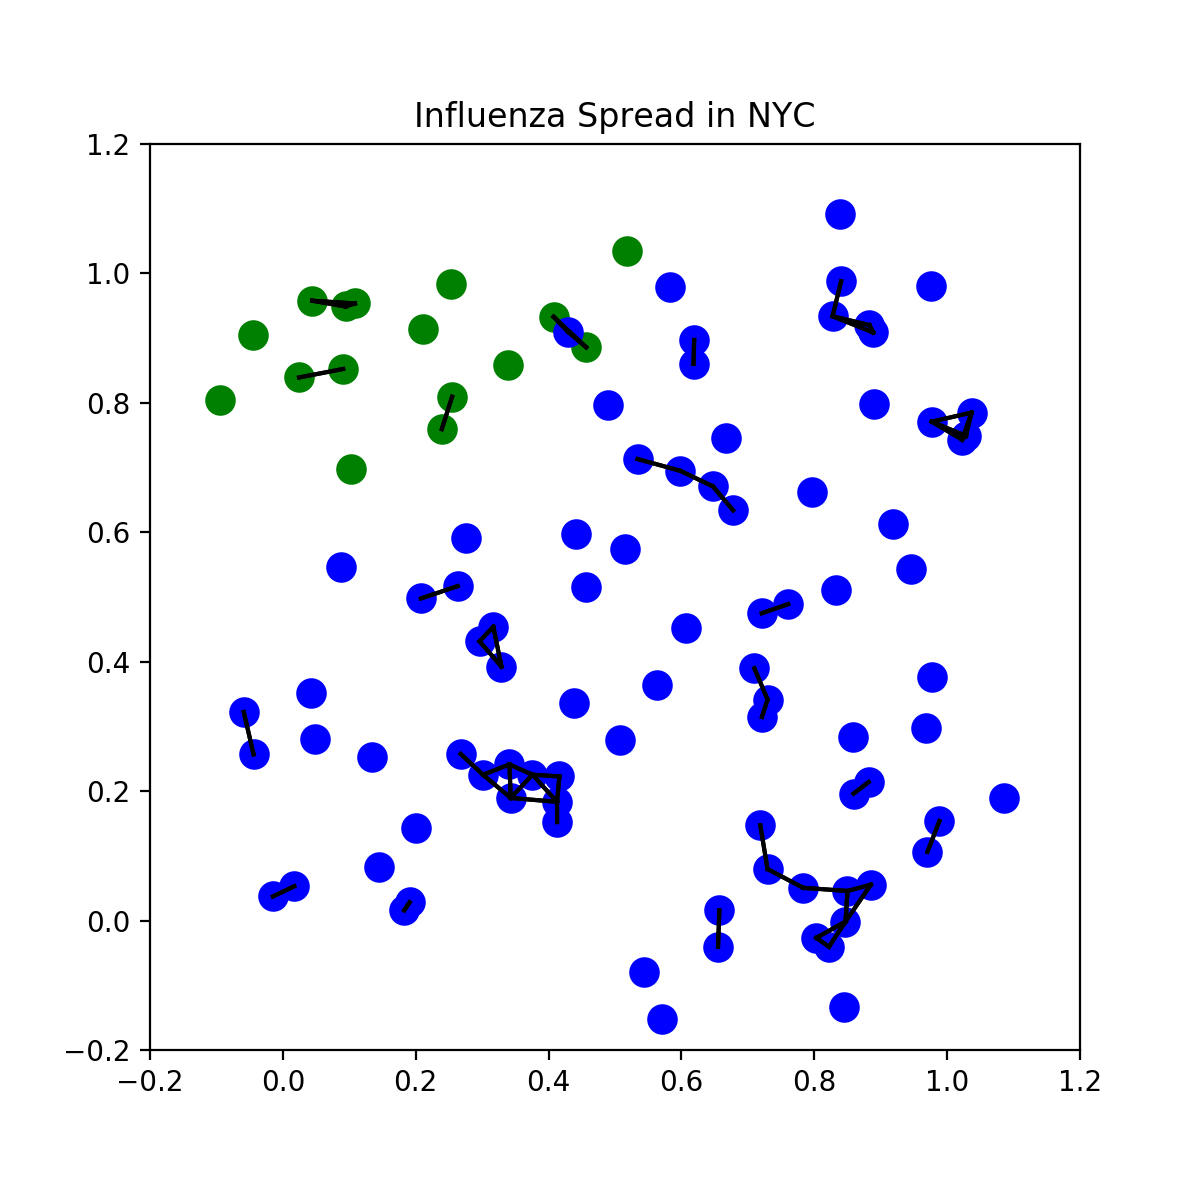

In [6]:
import random
import math
from scipy import stats
import numpy as np    
import time
import pylab as pl

# Creates dots
num = 100
coords = [(random.random(),random.random()) for i in range(num)]
group = [0 for i in range(num)]
    
# Creates edges   
def make_edges(coords, group):
    edges = [[] for i in range(num)]
    for i in range(len(coords)):
        for j in range(len(coords)):
            if i == j:
                continue
            dist = math.sqrt((coords[i][0]-coords[j][0])**2+(coords[i][1]-coords[j][1])**2)
            if dist < 0.07 and group[i] != 3 and group[j] != 3:
                edges[i].append(j)
    return edges

# Creates the initial plot
fig, ax = plt.subplots(figsize=(6, 6))
illness_start = [1e9 for i in range(num)]
group[0] = 1
illness_start[0] = 0

# Enabling the movement
for day in range(100):
    for i in range(num):
        if group[i] == 3:
            continue
        x, y = coords[i]
        shift_x, shift_y = ((random.random() - 0.5) / 20, (random.random() - 0.5) / 20)
        coords[i] = (x + shift_x, y + shift_y)

# Recovery or death phases        
    for i in range(num):
        if group[i] == 1 and day - illness_start[i] >= 14:
            group[i] = 2
        if group[i] == 1:
            death = random.random()
            if death <= 0.000014:
                group[i] = 3
    
    edges = make_edges(coords, group)
    
# Updating the groups based on their interaction    
    new_group = [i for i in group]
    for v in range(len(edges)):
        infectious_neighbors = 0
        for u in edges[v]:
            if group[u] == 1:
                infectious_neighbors += 1
        if group[v] == 0 and infectious_neighbors >= 1:
            prob = float(infectious_neighbors)/len(edges[v])
            if random.random() <= prob:
                new_group[v] = 1
                illness_start[v] = day
        group = new_group
    
    draw(ax, fig, coords, edges, group)
    time.sleep(0.2)    
    if 1 not in set(group):
        break
